In [2]:
!pip install pandas-datareader
!pip install tensorflow

In [61]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array

In [4]:
#df = pdr.get_data_tiingo('AAPL', api_key=key)

In [5]:
aapl = pd.read_csv('AAPL.csv')
aapl.shape

(1258, 15)

In [6]:
aapl.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [7]:
aapl_close = aapl.reset_index()['close']

In [8]:
aapl_close[1228:]

1228    273.25
1229    287.05
1230    284.43
1231    286.69
1232    282.80
1233    276.93
1234    268.37
1235    276.10
1236    275.03
1237    282.97
1238    283.17
1239    278.58
1240    287.73
1241    293.80
1242    289.07
1243    293.16
1244    297.56
1245    300.63
1246    303.74
1247    310.13
1248    315.01
1249    311.41
1250    307.65
1251    309.54
1252    307.71
1253    314.96
1254    313.14
1255    319.23
1256    316.85
1257    318.89
Name: close, dtype: float64

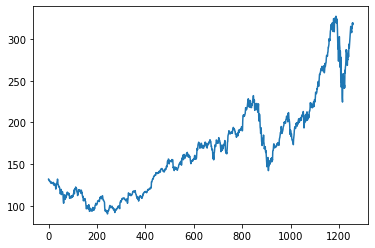

In [9]:
plt.plot(aapl_close)

## Using Min Max Scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
aapl_close = scaler.fit_transform(np.array(aapl_close).reshape(-1,1))

In [11]:
#value is converted into array
aapl_close

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [12]:
#split data into training and test 
training_size=int(len(aapl_close)*0.65)
test_size=len(aapl)-training_size
train_data,test_data=aapl_close[0:training_size,:],aapl_close[training_size:len(aapl_close):1]

In [13]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [14]:
#convert an array of values into dataset matrix
# Timesteps - how many days we have to consider for prediction
def create_dataset(dataset, time_step=1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [17]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [18]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [20]:
print(X_train)

[[[0.17607447]
  [0.17495567]
  [0.16862282]
  ...
  [0.09055982]
  [0.08388922]
  [0.09085536]]

 [[0.17495567]
  [0.16862282]
  [0.1696994 ]
  ...
  [0.08388922]
  [0.09085536]
  [0.0873934 ]]

 [[0.16862282]
  [0.1696994 ]
  [0.16727181]
  ...
  [0.09085536]
  [0.0873934 ]
  [0.09030651]]

 ...

 [[0.34801148]
  [0.32930845]
  [0.32145571]
  ...
  [0.50042219]
  [0.50413747]
  [0.5062062 ]]

 [[0.32930845]
  [0.32145571]
  [0.32694419]
  ...
  [0.50413747]
  [0.5062062 ]
  [0.51920966]]

 [[0.32145571]
  [0.32694419]
  [0.32230009]
  ...
  [0.5062062 ]
  [0.51920966]
  [0.53719497]]]


In [21]:
#Create Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 469ms/step - loss: 0.0183 - val_loss: 0.0462
Epoch 2/100
12/12 [==============================] - 3s 284ms/step - loss: 0.0034 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0010 - val_loss: 0.0072
Epoch 4/100
12/12 [==============================] - 3s 287ms/step - loss: 7.0016e-04 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 3s 275ms/step - loss: 6.2678e-04 - val_loss: 0.0037
Epoch 6/100
12/12 [==============================] - 3s 271ms/step - loss: 6.0538e-04 - val_loss: 0.0039
Epoch 7/100
12/12 [==============================] - 3s 273ms/step - loss: 5.8448e-04 - val_loss: 0.0036
Epoch 8/100
12/12 [==============================] - 3s 240ms/step - loss: 5.7342e-04 - val_loss: 0.0036
Epoch 9/100
12/12 [==============================] - 3s 267ms/step - loss: 5.9141e-04 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 3s 265ms/ste

In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.8.0'

## Predict the test data and plot the output

In [27]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [28]:
#inverse the transform
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [53]:
## Calculate RMSE Performance Metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.39553316390493

In [54]:
## Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

240.6778286617097

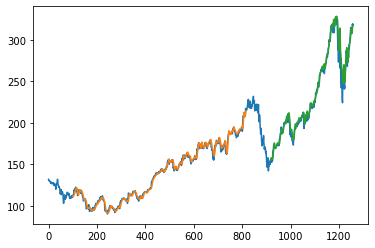

In [55]:
##Plotting
## shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(aapl_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(aapl_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(aapl_close)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(aapl_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [ ]:
#predict for futre 30 days

In [56]:
len(test_data)

441

In [58]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [59]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [60]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [64]:
# demonstrating prediction for next 30 days

lst_output = []
n_steps = 100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1, n_steps, 1)
        
        yhat = model.predict(x_input, verbose=0)
        print("day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
        
print(lst_output)


day input 0
day output 0
day input 1
day output 1
day input 2
day output 2
day input 3
day output 3
day input 4
day output 4
day input 5
day output 5
day input 6
day output 6
day input 7
day output 7
day input 8
day output 8
day input 9
day output 9
day input 10
day output 10
day input 11
day output 11
day input 12
day output 12
day input 13
day output 13
day input 14
day output 14
day input 15
day output 15
day input 16
day output 16
day input 17
day output 17
day input 18
day output 18
day input 19
day output 19
day input 20
day output 20
day input 21
day output 21
day input 22
day output 22
day input 23
day output 23
day input 24
day output 24
day input 25
day output 25
day input 26
day output 26
day input 27
day output 27
day input 28
day output 28
day input 29
day output 29
[[1.1178008317947388], [1.122272253036499], [1.1266273260116577], [1.1308811902999878], [1.1350516080856323], [1.1391574144363403], [1.1432137489318848], [1.147230863571167], [1.1512126922607422], [1.1551576852